todo
- problem description
- opisy wykresow
- co robimy z unknown values w zmiennych kategoricznych

# Problem description

## +TODO

# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

## Column description
| No.| Column      | Description |
| -- | ----------- | ----------- |
| 1. | CLIENTNUM | Client number. Unique identifier for the customer holding the account |
| 2. | Attrition_Flag | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| 3. | Customer_Age   | Customer's Age in Years |
| 4. | Gender | M=Male, F=Female |
| 5. | Dependent_count | Number of dependents - people who are financially (and otherwise) dependent on you.|
| 6. | Education_Level | Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| 7. |Marital_Status| Married, Single, Divorced, Unknown |
| 8. | Income_Category | Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >) |
| 9. | Card_Category | Type of Card (Blue, Silver, Gold, Platinum) |
| 10. | Months_on_book | Period of relationship with bank |
| 11. |Total_Relationship_Count| Total no. of products held by the customer |
| 12. | Months_Inactive_12_mon | No. of months inactive in the last 12 months |
| 13. | Contacts_Count_12_mon | No. of Contacts in the last 12 months |
| 14. | Credit_Limit | Credit Limit on the Credit Card |
| 15. | Total_Revolving_Bal | Total Revolving Balance on the Credit Card |
| 16. | Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months) |
| 17. | Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) |
| 18. | Total_Trans_Amt | Total Transaction Amount (Last 12 months) |
| 19. | Total_Trans_Ct | Total Transaction Count (Last 12 months) |
| 20. | Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) |
| 21. | Avg_Utilization_Ratio | Average Card Utilization Ratio |

# Dependencies loading

In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data loading

In [2]:
data = pd.read_csv('input_data/BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Getting rid of two last columns in dataset as they are redundant

# Data info

## Null values

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Converting target variable

## Feature description

### Categorical

In [10]:
data.dtypes[data.dtypes == 'object']

Attrition_Flag     object
Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [11]:
data.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In our dataset we have 6 categorical features

#### Mapping target data

In [12]:
data['Attrition_Flag'] = data['Attrition_Flag'].map( {'Attrited Customer': 1, 'Existing Customer': 0} ).astype(int)

Attirited customer = 1

Existing customer = 0

#### Categorical data description

In [13]:
(((data
.groupby("Attrition_Flag")
.agg({'Attrition_Flag':["count"]})
)['Attrition_Flag']
.reset_index()
)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Attrition_Flag,count,percent_of_all
0,0,8500,83.93
1,1,1627,16.07


Most of customers are Existing Customers

In [14]:
(((data
.groupby("Education_Level")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Education_Level,count,attrition_count,attrition_rate,percent_of_all
0,College,1013,154,15.20,10.00
1,Doctorate,451,95,21.06,4.45
2,Graduate,3128,487,15.57,30.89
3,High School,2013,306,15.20,19.88
4,Post-Graduate,516,92,17.83,5.10
5,Uneducated,1487,237,15.94,14.68
6,Unknown,1519,256,16.85,15.00


In [15]:
(((data
.groupby("Marital_Status")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Marital_Status,count,attrition_count,attrition_rate,percent_of_all
0,Divorced,748,121,16.18,7.39
1,Married,4687,709,15.13,46.28
2,Single,3943,668,16.94,38.94
3,Unknown,749,129,17.22,7.40


In [16]:
(((data
.groupby("Income_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Income_Category,count,attrition_count,attrition_rate,percent_of_all
0,$120K +,727,126,17.33,7.18
1,$40K - $60K,1790,271,15.14,17.68
2,$60K - $80K,1402,189,13.48,13.84
3,$80K - $120K,1535,242,15.77,15.16
4,Less than $40K,3561,612,17.19,35.16
5,Unknown,1112,187,16.82,10.98


In [17]:
(((data
.groupby("Card_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Card_Category,count,attrition_count,attrition_rate,percent_of_all
0,Blue,9436,1519,16.10,93.18
1,Gold,116,21,18.10,1.15
2,Platinum,20,5,25.00,0.20
3,Silver,555,82,14.77,5.48


Platinum card owners have highest ex

### Numerical

In [18]:
data.dtypes[data.dtypes == 'int64']

CLIENTNUM                   int64
Attrition_Flag              int64
Customer_Age                int64
Dependent_count             int64
Months_on_book              int64
Total_Relationship_Count    int64
Months_Inactive_12_mon      int64
Contacts_Count_12_mon       int64
Total_Revolving_Bal         int64
Total_Trans_Amt             int64
Total_Trans_Ct              int64
dtype: object

In [19]:
data.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Variable charts

## Gender

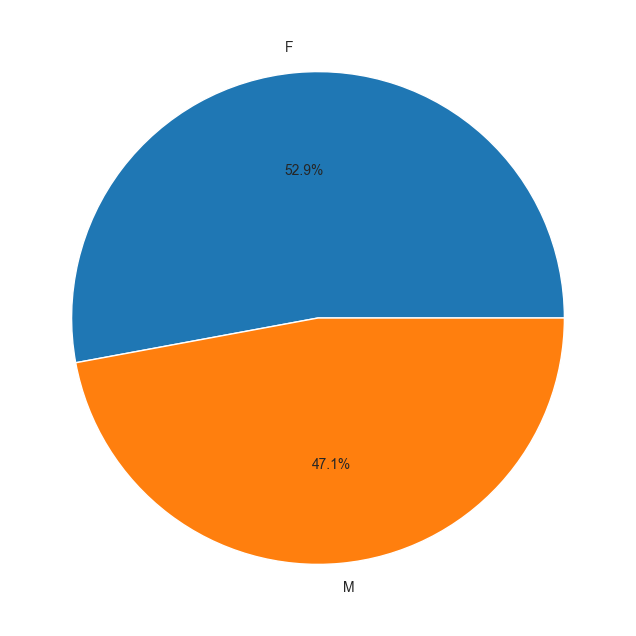

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

In our dataset there's a slight imbalance in gender distribution, with a 3% higher representation of female customers compared to male customers. 

In [ ]:
#pip install --upgrade seaborn
#dla kasi, po aktualizacji usun to

<Figure size 800x800 with 0 Axes>

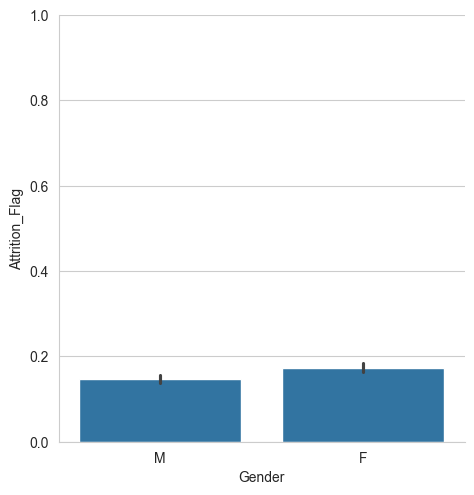

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
g = sns.catplot(data,x = "Gender",kind="bar",y = 'Attrition_Flag')
g.set(ylim=(0, 1))
plt.show()

<Figure size 800x800 with 0 Axes>

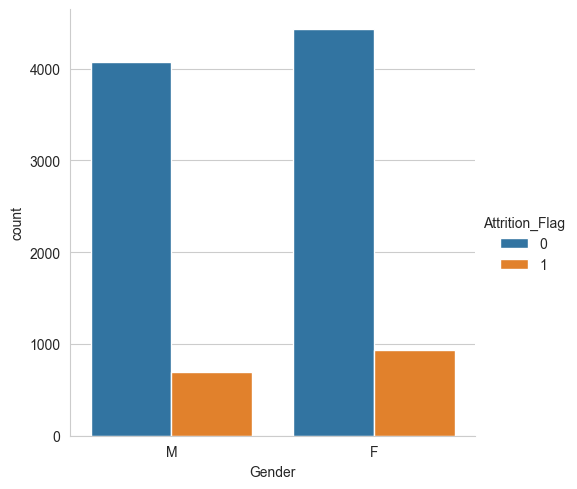

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.catplot(data,x = "Gender",kind="count",hue = 'Attrition_Flag')
plt.show()

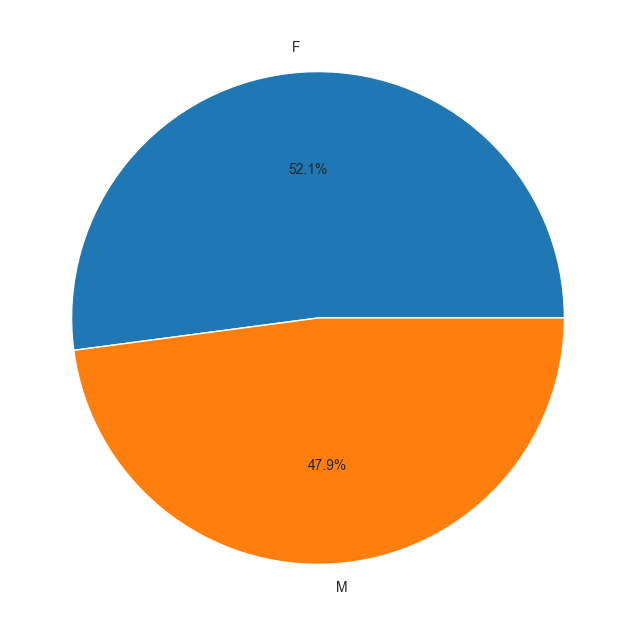

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
plt.pie(data[data['Attrition_Flag']==0]['Gender'].value_counts(),labels = data[data['Attrition_Flag']==0]['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

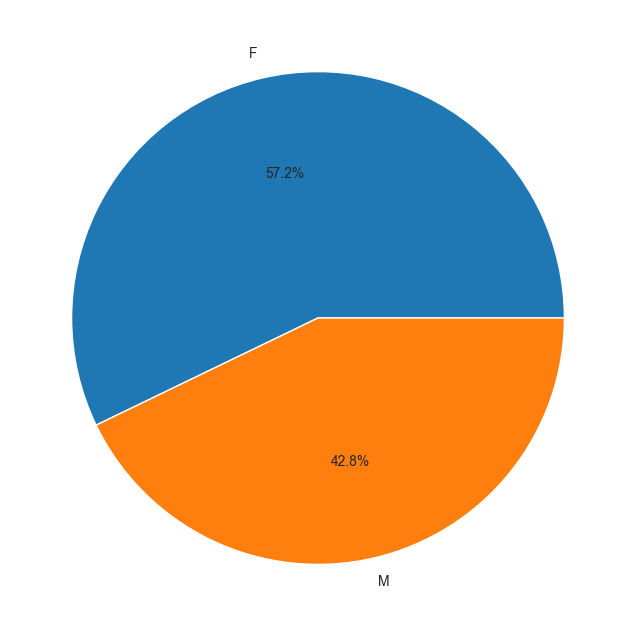

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
plt.pie(data[data['Attrition_Flag']==1]['Gender'].value_counts(),labels = data[data['Attrition_Flag']==1]['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

## Card Category

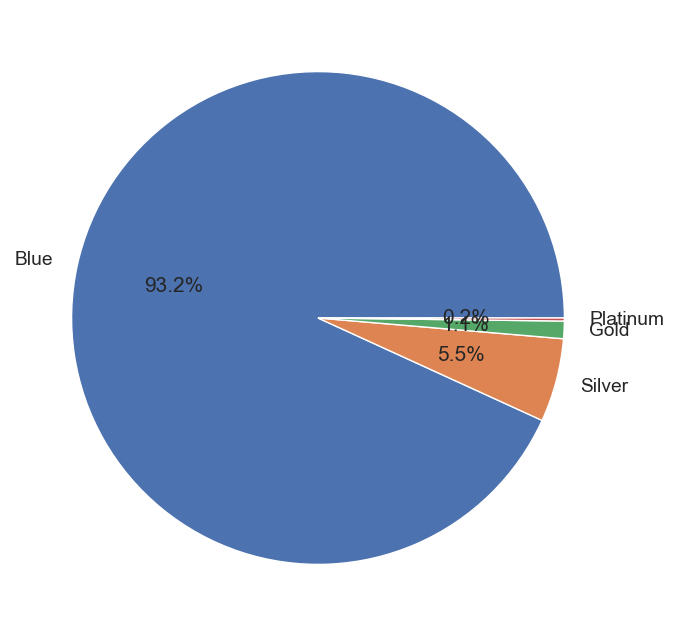

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
plt.pie(data['Card_Category'].value_counts(),labels = data['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

Proportion of different card categories among all of customers


In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
# plt.pie(data[data['Attrition_Flag']==1]['Card_Category'].value_counts(),labels = data[data['Attrition_Flag']==1]['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Figure size 800x800 with 0 Axes>

93.4% of Attrited customers had Blue Card, which is the cost common and basic one of all cards 

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
# plt.pie(data[data['Gender']=='F']['Card_Category'].value_counts(),labels = data[data['Gender']=='F']['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Figure size 800x800 with 0 Axes>

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
# plt.pie(data[data['Gender']=='M']['Card_Category'].value_counts(),labels = data[data['Gender']=='M']['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<Figure size 800x800 with 0 Axes>

95.2% of Woman have a Blue card, whereas 90.9% of Man have it

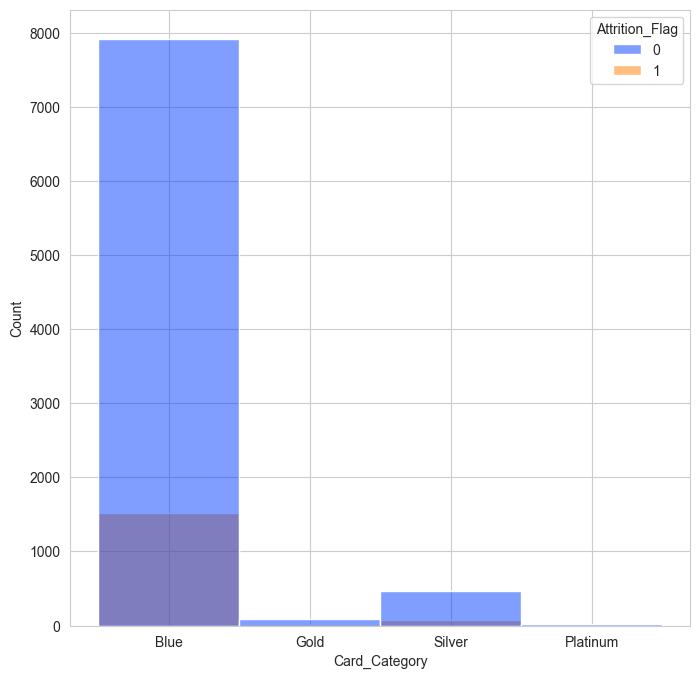

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.histplot(data=data,x="Card_Category",hue="Attrition_Flag",palette="bright")
plt.show()

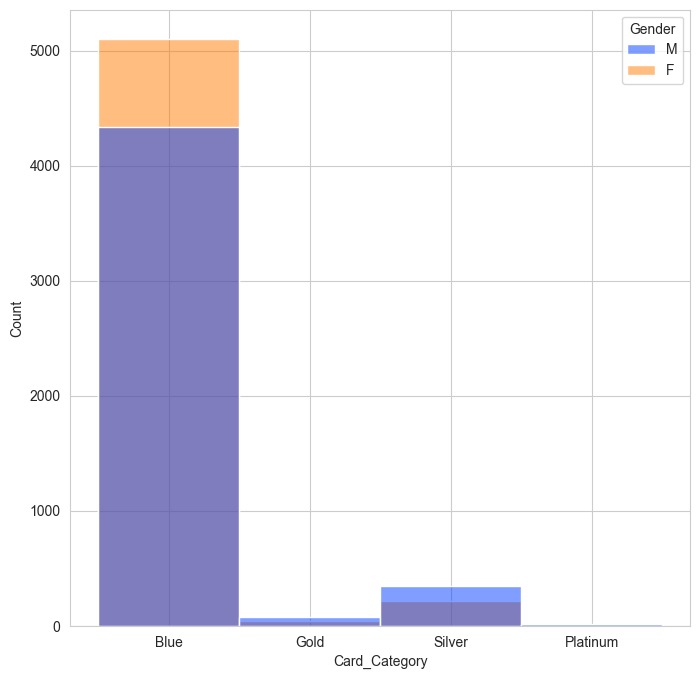

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.histplot(data=data,x="Card_Category",hue="Gender",palette="bright")
plt.show()

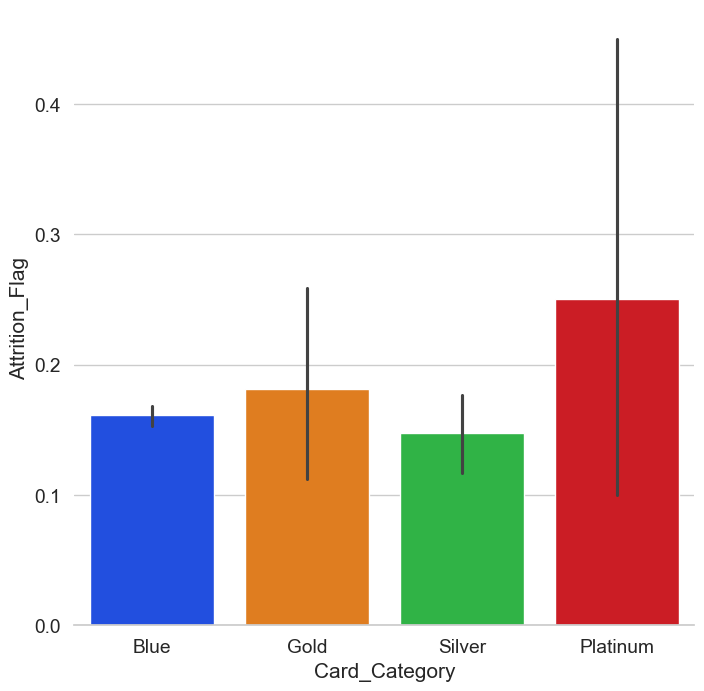

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8,8))
sns.barplot(data,x = "Card_Category",y = 'Attrition_Flag',palette="bright",hue = "Card_Category",legend = False)
sns.despine(left=True)
plt.show()

## Other

<Axes: xlabel='Customer_Age', ylabel='Count'>

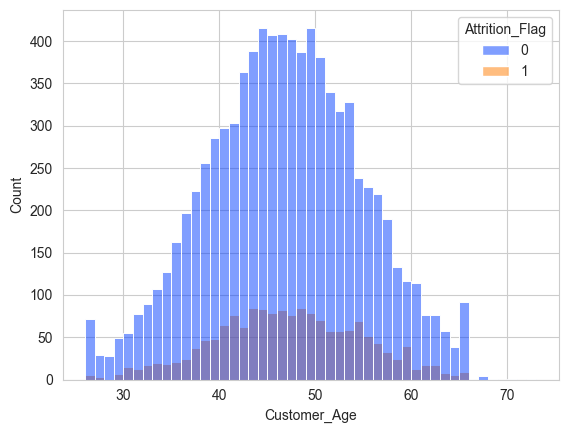

In [ ]:
# plt.figure(figsize=(15,6))
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.histplot(data=data,x="Customer_Age",hue="Attrition_Flag",palette="bright")
#lepiej korzystac z SNS, ta biblioteka jest nowsza niz plt i wyglada "lepiej"
#wiecej o kolorach w SNS: https://seaborn.pydata.org/tutorial/color_palettes.html

<Axes: xlabel='Customer_Age', ylabel='Density'>

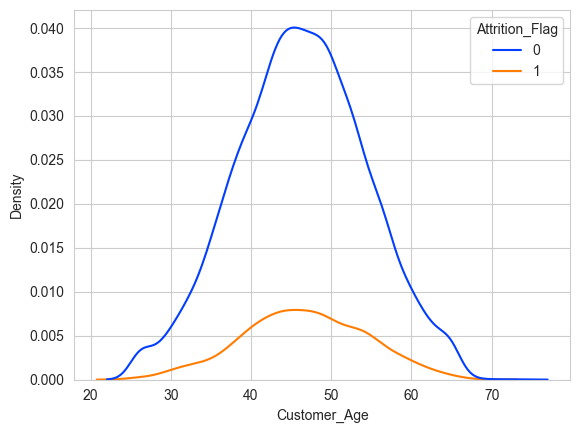

In [ ]:
# plt.figure(figsize=(15,6))
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.kdeplot(data=data,x="Customer_Age",hue="Attrition_Flag",palette="bright")

<Axes: xlabel='Months_on_book', ylabel='Density'>

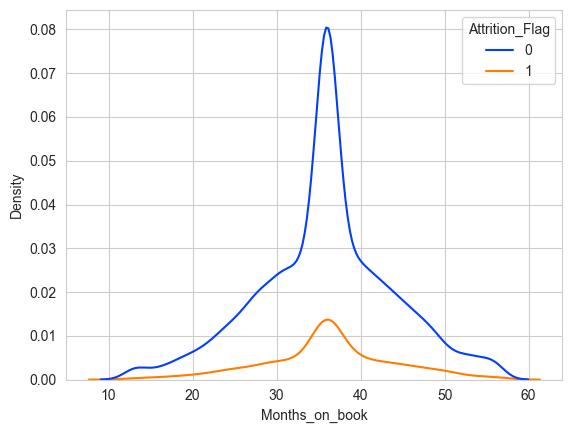

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.kdeplot(data=data,x="Months_on_book",hue="Attrition_Flag",palette="bright")

array([[<Axes: title={'center': 'CLIENTNUM'}>,
        <Axes: title={'center': 'Attrition_Flag'}>,
        <Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>],
       [<Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>],
       [<Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>],
       [<Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>,
        <Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>]], dtype=object)

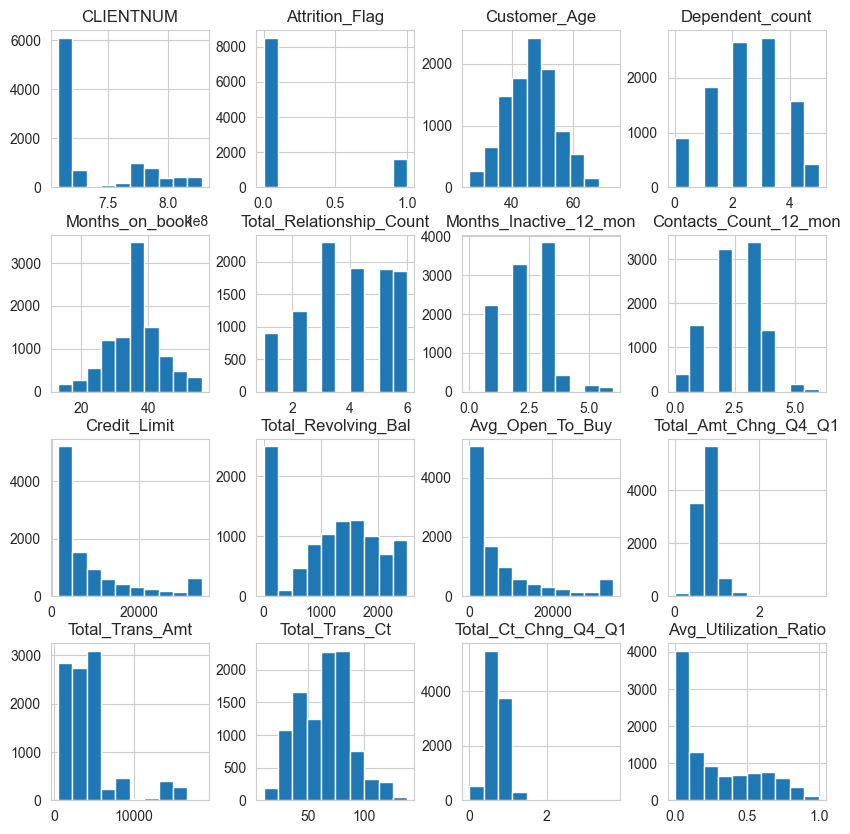

In [ ]:
data.hist(figsize=(10,10))

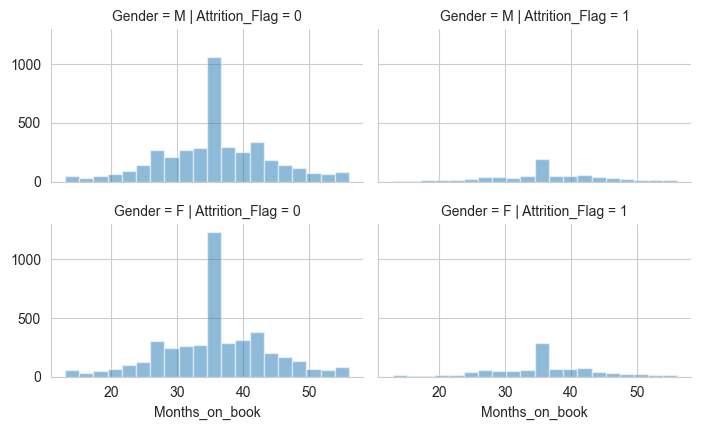

In [ ]:
grid = sns.FacetGrid(data, col='Attrition_Flag', row='Gender', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Months_on_book', alpha=.5, bins=20)
grid.add_legend()

## Correlation

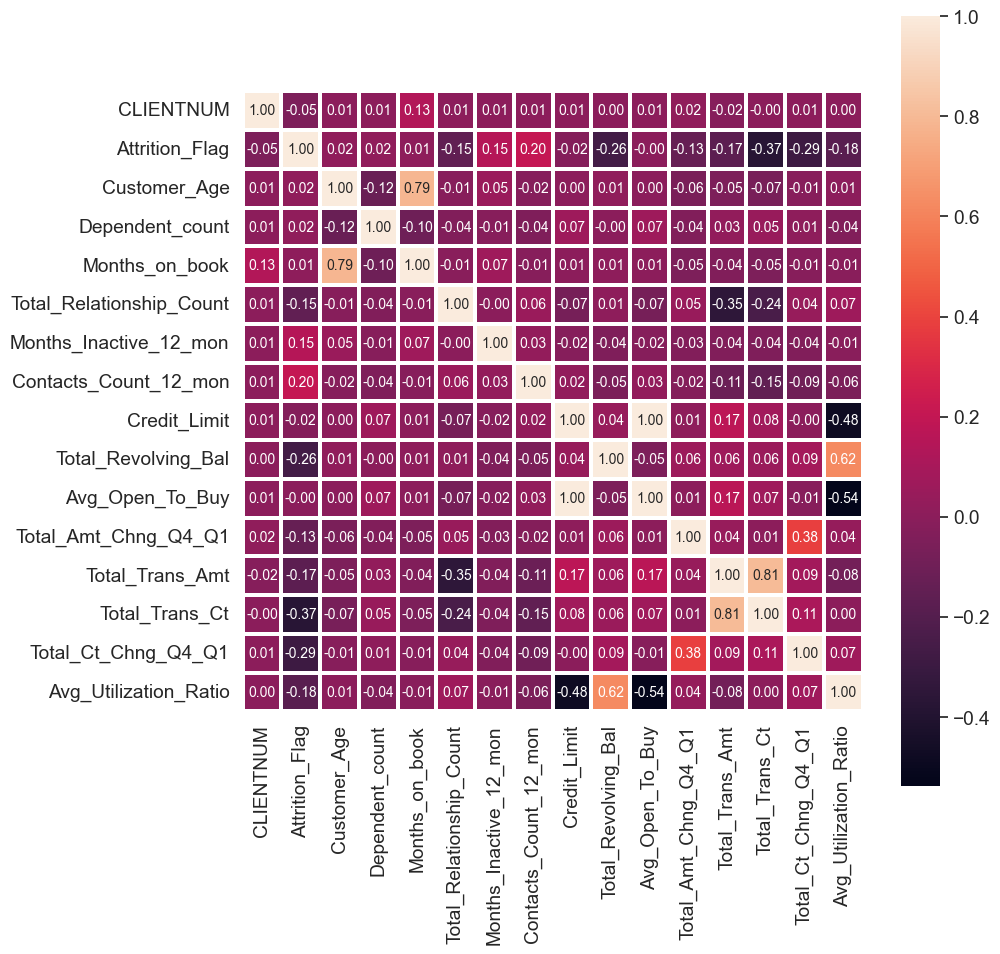

In [ ]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

# Dataset splitting